

# Recommendation Systems and Clustering Techniques – Beginner-Friendly Guide

---

## Part 1: Recommendation Systems

### What is a Recommendation System?

Imagine you walk into a bookstore and the staff says:
“You liked that mystery novel last week. Here’s another one people like you enjoyed.”

That’s exactly what a recommendation system does:

* **Content-Based Filtering**: Suggests items based on what *you* liked.
* **Collaborative Filtering**: Suggests items based on what *others like you* liked.

---

### Collaborative Filtering with SVD (Singular Value Decomposition)

Let’s say you have a matrix of users vs. items (like ratings of movies). Most of the cells are empty because not everyone has rated everything.

SVD helps by breaking this large sparse matrix into **three smaller matrices** that capture hidden patterns.

$$
R \approx U \cdot \Sigma \cdot V^T
$$

Where:

* $R$ = Original ratings matrix
* $U$ = User preference matrix
* $\Sigma$ = Diagonal matrix showing strength of hidden features
* $V^T$ = Item feature matrix

SVD helps predict missing ratings and recommend new items.



In [19]:
from surprise.model_selection import train_test_split, cross_validate
from scipy.cluster.hierarchy import dendrogram, linkage
from surprise import KNNBasic, Dataset, SVD, Dataset, Reader,  accuracy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Example (Using Surprise Library)

In [20]:
# Load built-in dataset
data = Dataset.load_builtin('ml-100k')

# Use SVD model
model = SVD()

# Evaluate using cross-validation
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9414  0.9332  0.9342  0.9368  0.9355  0.9362  0.0029  
MAE (testset)     0.7441  0.7346  0.7358  0.7385  0.7389  0.7384  0.0033  
Fit time          1.52    1.58    1.56    1.50    1.67    1.56    0.06    
Test time         0.45    0.24    0.40    0.35    0.21    0.33    0.09    


{'test_rmse': array([0.94140112, 0.93321923, 0.93417427, 0.93678471, 0.93545098]),
 'test_mae': array([0.74409262, 0.73455374, 0.73577104, 0.7385497 , 0.73888685]),
 'fit_time': (1.5180027484893799,
  1.5769987106323242,
  1.5619986057281494,
  1.4980039596557617,
  1.6659977436065674),
 'test_time': (0.44699811935424805,
  0.24299907684326172,
  0.39800477027893066,
  0.34999585151672363,
  0.20900201797485352)}

---

### Matrix Factorization with ALS (Alternating Least Squares)

ALS is a scalable matrix factorization technique where the algorithm alternates between:

* Fixing user vectors and solving item vectors
* Then fixing item vectors and solving user vectors

This "back-and-forth" continues until both are optimized. ALS is widely used in tools like Apache Spark for large datasets.

---

### Implementing Recommendation Engines with Surprise

The `Surprise` library makes it easy to build recommender systems.

In [21]:
# Load data
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=0.2)

# Use basic k-nearest neighbor collaborative filtering
model = KNNBasic()
model.fit(trainset)

# Make predictions and evaluate
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9785
RMSE: 0.978501951696256


---

## Part 2: Clustering

### What is Clustering?

Imagine you have a drawer full of mixed socks. You don’t know the brands, but you sort them by color and size into groups. That’s clustering.

Clustering is about finding hidden groups in data without using labels.

---

### KMeans Clustering

KMeans divides your data into **K groups** based on similarity.

#### Example:

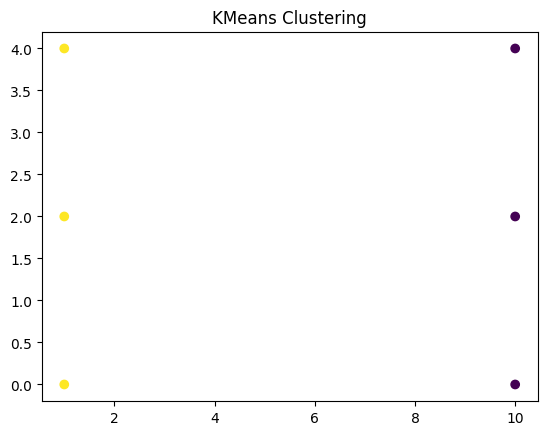

In [22]:
# Sample dataset
X = np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])

# Fit KMeans
model = KMeans(n_clusters=2)
model.fit(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis')
plt.title("KMeans Clustering")
plt.show()

---

### Hierarchical Agglomerative Clustering

This approach builds clusters from the bottom up:

* Start with each data point as its own cluster
* Merge the two closest clusters
* Repeat until only a few clusters remain

#### Dendrogram Visualization

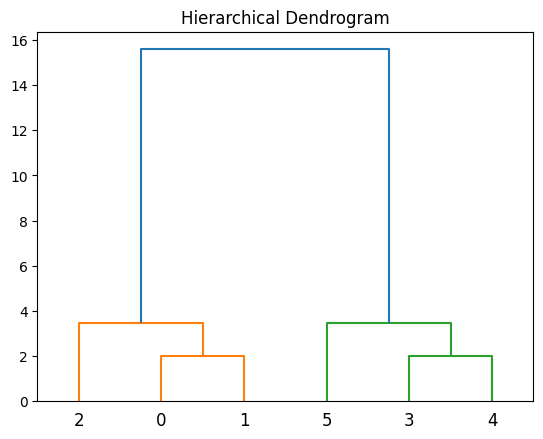

In [23]:
Z = linkage(X, method='ward')
dendrogram(Z)
plt.title("Hierarchical Dendrogram")
plt.show()

---

## Common Problems in Clustering

* Choosing the wrong number of clusters (try the Elbow Method)
* Clusters with very different shapes or densities
* Outliers pulling centroids away from real centers

---

## Semi-Supervised Learning and Look-Alike Models

Semi-supervised learning combines a small amount of labeled data with a large amount of unlabeled data.

**Example Use Case**:
You have data on customers who purchased a product and many who didn’t. You train on the known buyers, then find “look-alike” customers who share similar behavior patterns.

---

## Principal Component Analysis (PCA) in scikit-learn

PCA simplifies high-dimensional data by reducing it to fewer components, while keeping the most important information.

#### Example:

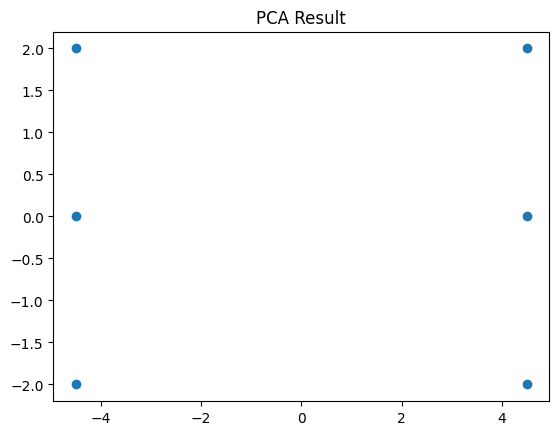

In [24]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualize
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title("PCA Result")
plt.show()

---

## Market Segmentation with Clustering

Market segmentation means dividing your customer base into smaller groups based on behavior or traits:

* Age
* Income
* Shopping habits

**Example**:

* Cluster customers based on purchase behavior.
* Send targeted promotions to each group.

---

## Exercises

1. Use KMeans to cluster the Iris dataset and visualize the results.
2. Apply PCA on a high-dimensional dataset and reduce to 2D for visualization.
3. Build a simple recommendation engine using the `Surprise` library.
4. Plot a dendrogram of customer similarity using hierarchical clustering.
5. Try out both SVD and KNN on a small ratings dataset and compare RMSE.

---

## Summary

* Recommendation systems use either what you like (content-based) or what others like (collaborative filtering).
* SVD and ALS help fill in missing user-item data.
* Clustering helps us discover hidden patterns without labels.
* PCA reduces dimensionality for easier visualization and modeling.
* Clustering is especially powerful in market segmentation and personalization.
